In [1]:
########################################
#                                      #
#           Michael Theisen            #
#           March 23rd, 2023           #
#           MNIST from Scratch         #
#                                      #
########################################

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
# data.head() sanity check.

In [3]:
data = np.array(data) # the data is NOW equal to a numpy array of the data
m, n = data.shape # m and n are now the dimentions, or the shape of the data
np.random.shuffle(data) # shuffle up the data to make it random

data_dev = data[0:1000].T # make a set of dev data and transpose the data
Y_dev = data_dev[0] # each column is an example instead of a row, just the first row
X_dev = data_dev[1:n] 
X_dev = X_dev / 255.

data_train = data[1000:m].T # the rest of the data used for training. Transposed.
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
# Now we need to initialize our parameters.
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 # needs -0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z): # First, we must define ReLU
    return np.maximum(Z, 0) # returns either 0 if 0 
                            # or less than and  or Z if greater than 0,
    
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))  # probability
    return A

def forward_prop(W1, b1, W2, b2, X): # takes W1, b1, W2, b2, and X as arguments
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # creates a new matrix with a tuple of its size
    one_hot_Y[np.arange(Y.size), Y] = 1 # indexing through one_hot_Y using arrays
    one_hot_Y = one_hot_Y.T # then transpose it
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    
    
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1100)

Iteration:  0
[6 6 6 ... 6 6 6] [1 4 7 ... 0 5 6]
Accuracy:  0.10439024390243902
Iteration:  100
[1 4 7 ... 0 5 6] [1 4 7 ... 0 5 6]
Accuracy:  0.6607560975609756
Iteration:  200
[1 4 7 ... 0 5 6] [1 4 7 ... 0 5 6]
Accuracy:  0.7712926829268293
Iteration:  300
[1 4 7 ... 0 5 6] [1 4 7 ... 0 5 6]
Accuracy:  0.813560975609756
Iteration:  400
[1 4 7 ... 0 5 6] [1 4 7 ... 0 5 6]
Accuracy:  0.8365365853658536
Iteration:  500
[1 4 7 ... 0 5 6] [1 4 7 ... 0 5 6]
Accuracy:  0.8509024390243902
Iteration:  600
[1 4 7 ... 0 5 6] [1 4 7 ... 0 5 6]
Accuracy:  0.8609268292682927
Iteration:  700
[1 4 7 ... 0 9 6] [1 4 7 ... 0 5 6]
Accuracy:  0.8681951219512195
Iteration:  800
[1 4 7 ... 0 9 6] [1 4 7 ... 0 5 6]
Accuracy:  0.8738536585365854
Iteration:  900
[1 4 7 ... 0 9 6] [1 4 7 ... 0 5 6]
Accuracy:  0.8792682926829268
Iteration:  1000
[1 4 7 ... 0 9 6] [1 4 7 ... 0 5 6]
Accuracy:  0.8827804878048781


Nice! 

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Actual Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Actual Label:  1


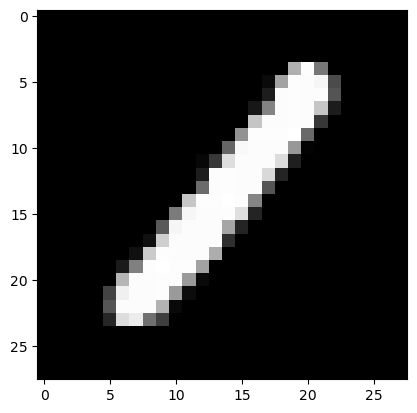

Prediction:  [4]
Actual Label:  4


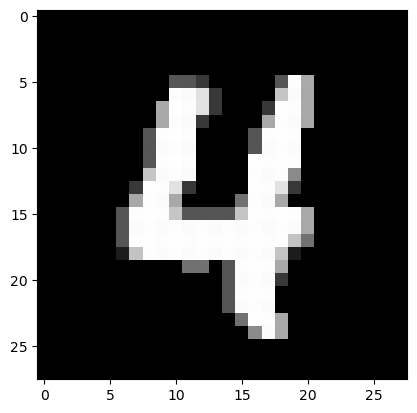

Prediction:  [7]
Actual Label:  7


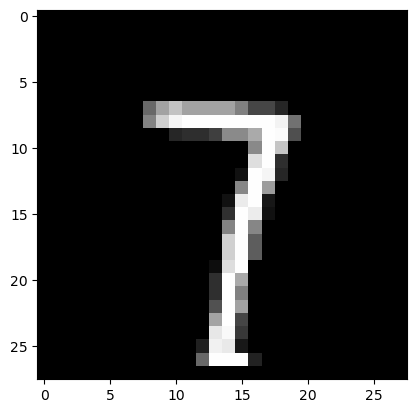

Prediction:  [8]
Actual Label:  8


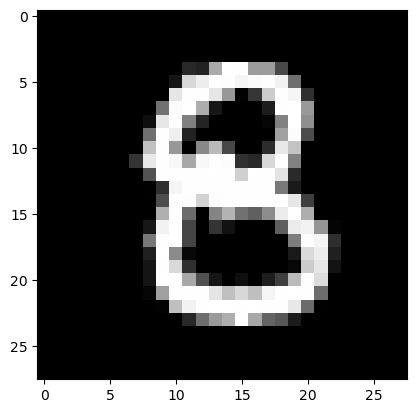

Prediction:  [7]
Actual Label:  7


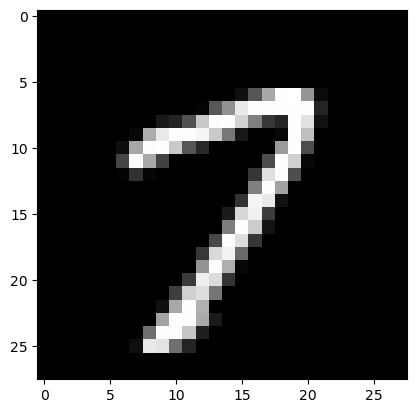

Prediction:  [1]
Actual Label:  7


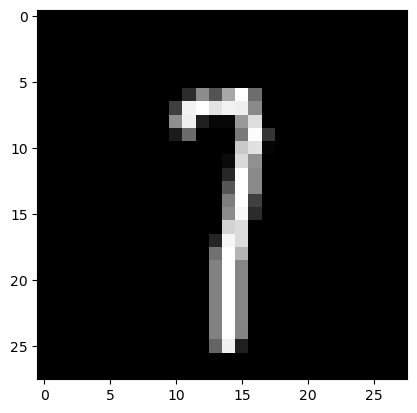

Prediction:  [5]
Actual Label:  5


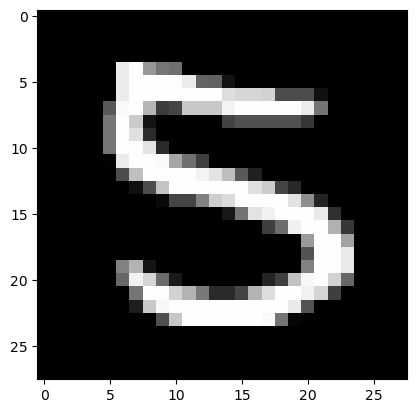

Prediction:  [0]
Actual Label:  0


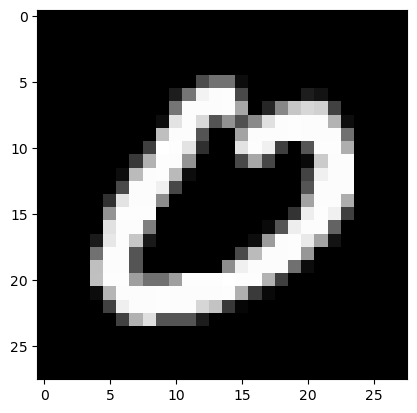

Prediction:  [4]
Actual Label:  4


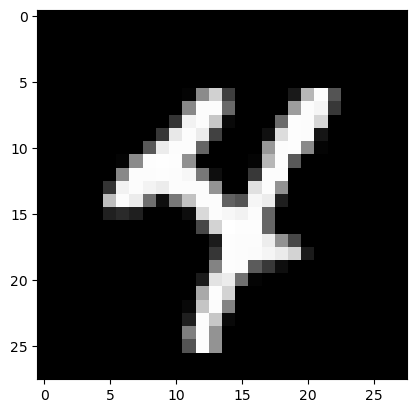

Prediction:  [9]
Actual Label:  7


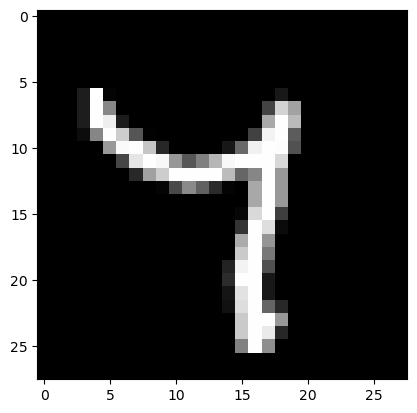

Prediction:  [9]
Actual Label:  9


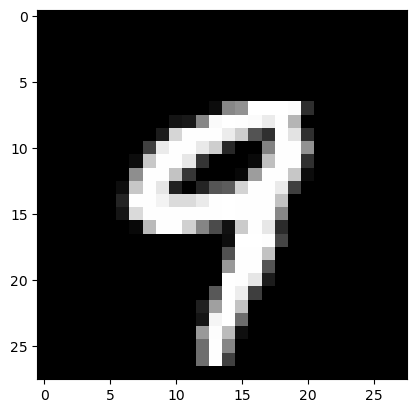

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 9 3 9 9 1 7 4 7 8 9 5 0 8 6 5 1 0 8 1 6 6 3 2 9 9 4 7 2 7 6 6 6 7 1 1 6
 6 4 6 3 6 3 9 5 9 5 1 1 2 7 6 4 8 9 6 2 2 9 5 3 3 3 7 2 9 4 5 6 9 0 8 6 7
 1 1 4 6 0 7 0 1 1 3 9 1 5 8 7 7 0 1 9 5 2 8 8 2 0 2 1 9 1 2 1 3 0 8 3 0 8
 2 8 0 4 9 6 3 7 7 6 4 1 6 7 0 8 9 0 0 6 4 1 1 1 6 5 0 0 5 5 9 7 1 5 0 0 5
 9 8 4 2 4 7 6 3 7 9 5 5 5 9 5 8 4 8 0 6 4 7 1 8 2 2 7 1 9 1 2 5 6 2 3 1 3
 4 4 8 9 6 1 7 9 9 9 7 7 2 9 8 5 2 1 3 5 3 7 2 2 9 4 6 1 0 3 8 5 2 5 9 3 9
 1 3 5 8 5 8 1 5 4 8 0 6 5 3 8 7 5 8 6 4 1 5 7 1 4 6 8 1 1 4 1 5 0 4 2 1 2
 7 8 3 7 2 7 9 7 9 6 2 6 6 3 4 7 7 7 7 8 8 8 6 0 6 5 3 6 8 1 6 3 6 1 1 8 8
 5 3 9 8 6 7 8 9 6 1 5 2 1 2 9 5 9 4 5 0 1 1 1 8 4 2 0 7 2 4 4 1 9 2 9 4 4
 8 2 4 1 7 1 7 6 1 5 0 6 5 7 3 6 7 5 5 1 9 1 6 1 0 5 1 8 2 4 3 5 2 5 6 8 0
 1 9 3 2 7 2 7 9 5 8 0 8 3 8 0 0 0 7 3 5 8 1 5 1 9 0 4 6 1 1 6 3 9 5 4 4 8
 8 5 7 4 6 1 5 6 4 9 3 6 2 0 9 7 1 9 0 2 8 0 3 6 7 2 7 8 8 1 8 8 9 2 0 3 6
 4 2 2 9 1 2 6 1 6 5 3 7 2 3 8 8 9 1 6 7 7 4 7 8 3 3 3 0 9 6 0 2 7 2 2 2 7
 4 4 8 4 6 8 3 8 1 1 5 2 

0.854